In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(".."))
from ficaria.missing_imputation import KIImputer, FCKIImputer

In [8]:
np.random.seed(42)

n_rows = 50
data = {
    'A': np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_rows, p=[0.05, 0.2, 0.2, 0.2, 0.25, 0.10]),
    'B': np.random.choice([5, 4, 3, 2, 1, np.nan], size=n_rows, p=[0.1, 0.15, 0.3, 0.1, 0.15, 0.2]),
    'C': np.random.choice([9, 8, 7, 6, 5, np.nan], size=n_rows, p=[0.2, 0.2, 0.2, 0.15, 0.1, 0.15])
}

X_test = pd.DataFrame(data)

In [9]:
# Imputation with KIImputer
ki_imputer = KIImputer()
ki_imputer.fit(X_test)
X_imputed_ki = ki_imputer.transform(X_test)

In [10]:
# Imputation with FCKIImputer
fcki_imputer = FCKIImputer()
fcki_imputer.fit(X_test)
X_imputed_fcki = fcki_imputer.transform(X_test)

clusters:  [1 4 1 3 4 0 0 3 1 1 0 1 1 4 4 0 4 1 0 3 4 0 0 1 2 2 4 3 1 0 3 2 0 0 3 1 2
 4 1 3 0 2 4 2 2 1 4 3 1 0]


In [11]:
print("Original data with missing values:")
print(X_test.head(10))
print("\nData after imputation with KIImputer:")
print(pd.DataFrame(X_imputed_ki, columns=X_test.columns).head(10))
print("\nData after imputation with FCKIImputer:")
print(pd.DataFrame(X_imputed_fcki, columns=X_test.columns).head(10))

Original data with missing values:
     A    B    C
0  3.0  NaN  9.0
1  NaN  1.0  6.0
2  5.0  NaN  8.0
3  4.0  NaN  7.0
4  2.0  2.0  NaN
5  2.0  NaN  8.0
6  2.0  5.0  7.0
7  5.0  4.0  5.0
8  4.0  5.0  8.0
9  5.0  3.0  9.0

Data after imputation with KIImputer:
     A         B    C
0  3.0  3.500000  9.0
1  5.0  1.000000  6.0
2  5.0  2.947655  8.0
3  4.0  2.955933  7.0
4  2.0  2.000000  8.0
5  2.0  3.285714  8.0
6  2.0  5.000000  7.0
7  5.0  4.000000  5.0
8  4.0  5.000000  8.0
9  5.0  3.000000  9.0

Data after imputation with FCKIImputer:
         A         B    C
0  3.00000  3.000000  9.0
1  2.08787  1.000000  6.0
2  5.00000  3.000001  8.0
3  4.00000  5.000000  7.0
4  2.00000  2.000000  6.0
5  2.00000  4.000000  8.0
6  2.00000  5.000000  7.0
7  5.00000  4.000000  5.0
8  4.00000  5.000000  8.0
9  5.00000  3.000000  9.0


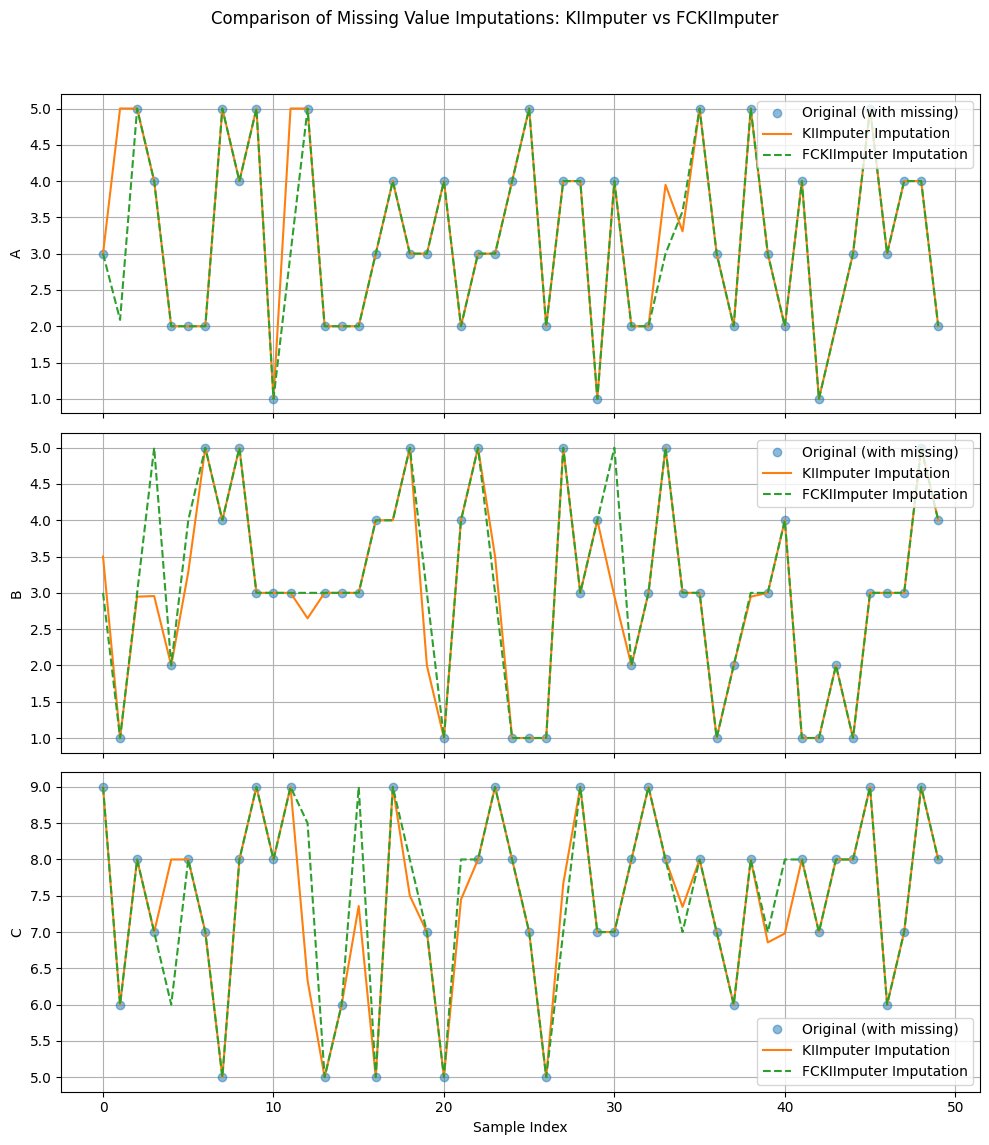

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12), sharex=True)

cols = X_test.columns
x = np.arange(n_rows)

for i, col in enumerate(cols):
    axes[i].plot(x, X_test[col], 'o', label='Original (with missing)', alpha=0.5)
    axes[i].plot(x, X_imputed_ki[:, i], '-', label='KIImputer Imputation')
    axes[i].plot(x, X_imputed_fcki.iloc[:, i], '--', label='FCKIImputer Imputation')
    axes[i].set_ylabel(col)
    axes[i].legend()
    axes[i].grid(True)

axes[-1].set_xlabel("Sample Index")

plt.suptitle("Comparison of Missing Value Imputations: KIImputer vs FCKIImputer")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
